In [4]:
import keras as ks
#Preprocessing
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
#modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
#local file nav
import os
#plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import seaborn as sns

import pandas as pd
import numpy as np

#from sklearn.model_selection import train_test_split

from tqdm import tqdm

#import tensorflow as tf
from cv2 import imread, imshow

np.set_printoptions(threshold=60)

Using TensorFlow backend.


## Data Loading and Preprocessing

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [14]:
train_directory = '../text-recognition/train'
test_directory = '../text-recognition/test'

In [76]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_directory,
        color_mode = 'grayscale',
        target_size=(64, 64),
        class_mode = 'categorical', 
        batch_size=11295)

Found 11295 images belonging to 56 classes.


In [77]:
test_generator =ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_directory,
        color_mode = 'grayscale',
        target_size=(64, 64),
        class_mode = 'categorical', 
        batch_size= 1443)

Found 1443 images belonging to 56 classes.


In [65]:
# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# model.fit_generator(generator=train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=valid_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=10

In [98]:
train_data[1].shape

(64, 64, 1)

In [87]:
train_data, train_labels = next(train_generator)
test_data, test_labels = next(test_generator)

In [127]:
test_data.shape

(1443, 64, 64, 1)

In [126]:
test_labels.shape

(1443, 56)

In [81]:
train_data.shape

(11295, 64, 64, 1)

In [82]:
train_labels.shape

(11295, 56)

## Reshaping

In [124]:
# Reshape the train images 
train_img_unrow = train_data.reshape(11295, -1).T

In [133]:
# Reshape the test images
test_img_unrow = test_data.reshape(1443, -1).T

In [134]:
print(train_img_unrow.shape)
print(test_img_unrow.shape)

(4096, 11295)
(4096, 1443)


In [140]:
train_labels.shape

(11295, 56)

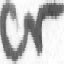

In [141]:
array_to_img(train_data[240])

In [143]:
train_labels[240]
#checking that images line up with classes. 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

In [145]:
train_generator.class_indices

{'But': 0,
 'Sir': 1,
 'a': 2,
 'all': 3,
 'an': 4,
 'and': 5,
 'are': 6,
 'at': 7,
 'be': 8,
 'been': 9,
 'by': 10,
 'can': 11,
 'for': 12,
 'from': 13,
 'had': 14,
 'has': 15,
 'have': 16,
 'her': 17,
 'his': 18,
 'in': 19,
 'into': 20,
 'is': 21,
 'it': 22,
 'last': 23,
 'made': 24,
 'more': 25,
 'no': 26,
 'not': 27,
 'of': 28,
 'on': 29,
 'one': 30,
 'only': 31,
 'or': 32,
 'our': 33,
 'out': 34,
 'people': 35,
 'said': 36,
 'should': 37,
 'so': 38,
 'talks': 39,
 'than': 40,
 'that': 41,
 'the': 42,
 'their': 43,
 'them': 44,
 'there': 45,
 'this': 46,
 'to': 47,
 'was': 48,
 'were': 49,
 'when': 50,
 'which': 51,
 'who': 52,
 'will': 53,
 'with': 54,
 'would': 55}

In [ ]:
# as first layer in a sequential model:
model = Sequential()
model.add(Dense(32, input_shape=(16,)))
# now the model will take as input arrays of shape (*, 16)
# and output arrays of shape (*, 32)

# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(32))

In [151]:
model = Sequential()
#The first convolution
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(2, 2))
# # The second convolution
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# The third convolution
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#The fourth convolution
model.add(Convolution2D(64, (3,3), activation='relu')),
model.add(MaxPooling2D(2,2)),
# # The fifth convolution

model.add(Convolution2D(64, (3,3), activation='relu'),
model.add(MaxPooling2D(2,2)),

# # # Flatten the results to feed into a dense layer
model.add(Flatten())
# # 128 neuron in the fully-connected layer
model.add(Dense(128, activation='relu'))
# 5 output neurons for 5 classes with the softmax activation
model.add(Dense(56, activation='softmax'))


In [ ]:
## Optimizer

In [153]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'RMSprop',
              metrics=['accuracy'])

In [155]:
train_data.shape

(11295, 64, 64, 1)

In [157]:
train_labels.shape

(11295, 56)

In [161]:
x_val = train_data[:1000]
partial_x_train = train_data[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [160]:
3000 + 8295

11295

In [169]:
baseline_fit = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=24,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 10295 samples, validate on 1000 samples
Epoch 1/24
10295/10295 [==============================] - 27s 3ms/step - loss: 0.0764 - accuracy: 0.9737 - val_loss: 0.6674 - val_accuracy: 0.8750
Epoch 2/24
10295/10295 [==============================] - 24s 2ms/step - loss: 0.0752 - accuracy: 0.9745 - val_loss: 0.6996 - val_accuracy: 0.8610
Epoch 3/24
10295/10295 [==============================] - 23s 2ms/step - loss: 0.0609 - accuracy: 0.9803 - val_loss: 0.7497 - val_accuracy: 0.8710
Epoch 4/24
10295/10295 [==============================] - 23s 2ms/step - loss: 0.0576 - accuracy: 0.9807 - val_loss: 0.7512 - val_accuracy: 0.8690
Epoch 5/24
10295/10295 [==============================] - 24s 2ms/step - loss: 0.0537 - accuracy: 0.9821 - val_loss: 0.7340 - val_accuracy: 0.8720
Epoch 6/24
10295/10295 [==============================] - 25s 2ms/step - loss: 0.0522 - accuracy: 0.9816 - val_loss: 0.8208 - val_accuracy: 0.8650
Epoch 7/24
10295/10295 [==============================] - 30s 3ms/ste

In [171]:
test_img = open('../text-recognition/test/it/g01-000-03-02.png')

In [5]:
img = imread('../text-recognition/test/it/g01-000-03-02.png')

In [ ]:
imshow('image', img)

In [6]:
train_df.shape

(11295, 4)

In [7]:
test_df.shape

(1443, 4)

In [8]:
11295 +1443

12738

In [ ]:
#baseline ConvNet Architecture example


# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

## Additional EDA Prep
